In [1]:
! pip install sqlalchemy
! pip install PyMySQL

# Import

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # to get the password without showing the input



password = getpass.getpass()


pd.set_option('display.max_rows',None) #Display all rows

# Create a Python connection with SQL database and retrieve the results of the last two queries (also mentioned below) as dataframes:


········


In [11]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)


data = pd.read_sql_query('''
SELECT *
FROM table_7
LEFT JOIN table_5 using(film_id)
LEFT JOIN table_6 using(film_id)
LEFT JOIN table_4 using(film_id)
order by film_id asc;
'''                     
                                           
,engine)
data.head(100)

,film_id,if_rented_june_2005,number_of_copies,number_of_may_rentals,actor_id
0,1,1,8,2.0,198.0
1,2,0,3,NaN,NaN
2,3,1,4,1.0,NaN
3,4,1,7,2.0,81.0
4,5,1,3,1.0,181.0
5,6,1,6,2.0,23.0
6,7,1,5,NaN,NaN
7,8,1,4,3.0,NaN
8,9,0,5,NaN,NaN
9,10,1,7,NaN,37.0


In [12]:
data.shape

(1017, 5)

In [16]:
data1 = data.copy()

In [17]:
data1 = data1.set_index('film_id')

# Cleaning

In [18]:
data1.isna().sum()

if_rented_june_2005        0
number_of_copies           0
number_of_may_rentals    293
actor_id                 651
dtype: int64

In [19]:
data1 = data1.fillna(0)
data1.isna().sum()

if_rented_june_2005      0
number_of_copies         0
number_of_may_rentals    0
actor_id                 0
dtype: int64

# Describe

In [20]:
data1.describe().round(2)

,if_rented_june_2005,number_of_copies,number_of_may_rentals,actor_id
count,1017.00,1017.00,1017.00,1017.00
mean,0.94,4.78,1.20,36.98
std,0.24,1.81,1.05,61.43
min,0.00,2.00,0.00,0.00
25%,1.00,3.00,0.00,0.00
50%,1.00,5.00,1.00,0.00
75%,1.00,6.00,2.00,81.00
max,1.00,8.00,5.00,198.00


# Data is very imbalanced too: 955 were rented vs 62 films not rented

In [21]:
data1['if_rented_june_2005'].value_counts()

1    955
0     62
Name: if_rented_june_2005, dtype: int64

# Manual Downsampling to: 62 vs 62 samples 

In [22]:
# Manually
# getting sample with the same amount as the minority classa
A = data1[data1['if_rented_june_2005'] == 1].sample(62)
B = data1[data1['if_rented_june_2005'] == 0].sample(62)

downsampled = pd.concat([A,B]).sample(frac=1) # .sample(frac=1) here is just to shuffle the dataframe
downsampled

,if_rented_june_2005,number_of_copies,number_of_may_rentals,actor_id
film_id,,,,
385,1,5,2.0,13.0
2,0,3,0.0,0.0
539,1,2,2.0,181.0
939,0,4,0.0,0.0
472,0,2,0.0,0.0
913,0,6,0.0,0.0
125,0,2,0.0,198.0
676,1,6,2.0,0.0
383,1,5,1.0,0.0


In [23]:
downsampled['if_rented_june_2005'].value_counts()

1    62
0    62
Name: if_rented_june_2005, dtype: int64

In [24]:
downsampled.isna().sum()

if_rented_june_2005      0
number_of_copies         0
number_of_may_rentals    0
actor_id                 0
dtype: int64

# Correlation Matrix

### Interesting correlation with May number of rentals vs target value (i.e. if movies were rented on june 2005)
### The more a movie was rented in May, the more likely it was rented in June.

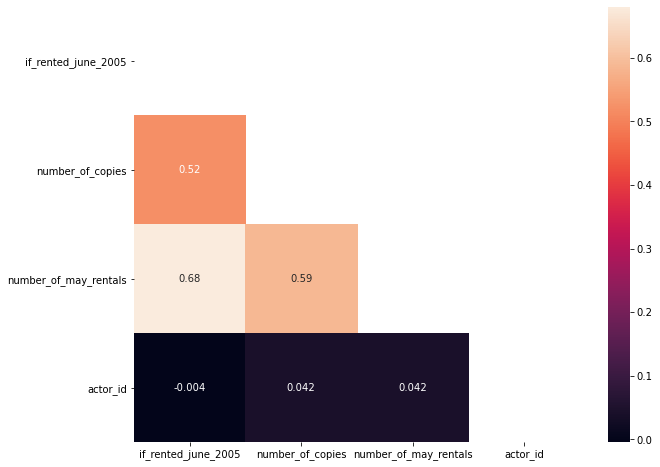

In [33]:
mask = np.zeros_like(downsampled.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(downsampled.corr(), mask=mask, annot=True)
plt.show()

# Plotting

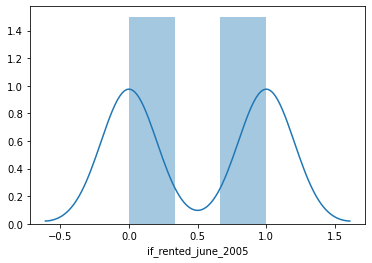

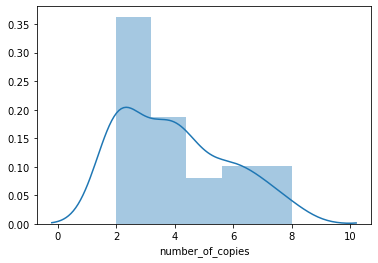

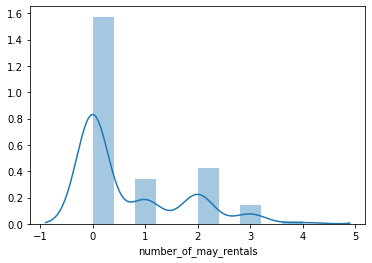

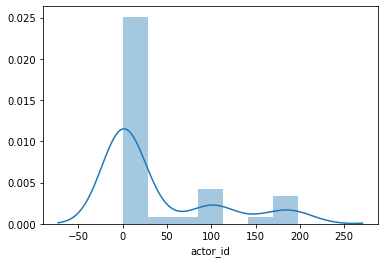

In [34]:
for col in downsampled.select_dtypes(np.number):
    sns.distplot(downsampled[col])
    plt.show()

# Analyzing Results

In [35]:
for col in downsampled.select_dtypes('object'):
    print(downsampled[col].value_counts(), '\n') #unique()

# Analyzing Results

In [36]:
y = downsampled['if_rented_june_2005']
X = downsampled.drop('if_rented_june_2005', axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
classification = LogisticRegression(random_state=42, max_iter=1000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [48]:
classification.score(X_test, y_test) # checking the score without the need for predictions
# 0.8729913265649163

0.84

In [49]:
predictions = classification.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1], dtype=int64)

In [50]:
y_test

film_id
558    0
164    1
136    0
180    0
453    0
884    0
427    1
447    1
965    1
472    0
803    1
357    0
248    1
301    1
810    1
937    1
24     1
62     0
959    0
214    0
442    1
9      0
385    1
929    1
682    1
Name: if_rented_june_2005, dtype: int64

In [51]:
predictions_ = classification.predict_proba(X_test)
predictions_

array([[8.58601617e-01, 1.41398383e-01],
       [8.05401836e-04, 9.99194598e-01],
       [8.20428880e-01, 1.79571120e-01],
       [8.58601617e-01, 1.41398383e-01],
       [6.44188536e-01, 3.55811464e-01],
       [7.95711888e-01, 2.04288112e-01],
       [7.18140287e-01, 2.81859713e-01],
       [4.15317092e-03, 9.95846829e-01],
       [8.58601617e-01, 1.41398383e-01],
       [8.58601617e-01, 1.41398383e-01],
       [7.55764521e-02, 9.24423548e-01],
       [7.14162693e-01, 2.85837307e-01],
       [3.25643833e-01, 6.74356167e-01],
       [2.79290746e-04, 9.99720709e-01],
       [4.83902107e-03, 9.95160979e-01],
       [6.15778981e-01, 3.84221019e-01],
       [7.14162693e-01, 2.85837307e-01],
       [8.77049213e-01, 1.22950787e-01],
       [8.58601617e-01, 1.41398383e-01],
       [7.14162693e-01, 2.85837307e-01],
       [1.95515686e-03, 9.98044843e-01],
       [6.15778981e-01, 3.84221019e-01],
       [1.02303022e-02, 9.89769698e-01],
       [1.65758658e-01, 8.34241342e-01],
       [2.364987

# Confusion Matrix

In [52]:
confusion_matrix(y_test, predictions) # normalize : {'true', 'pred', 'all'}

array([[11,  0],
       [ 4, 10]], dtype=int64)

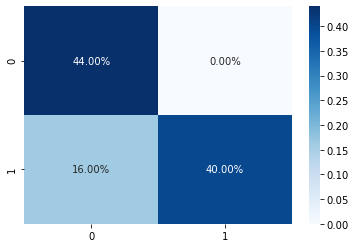

In [53]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Blues')

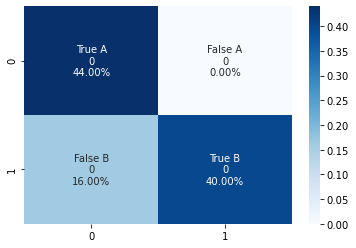

In [54]:
group_names = ['True A', 'False A', 'False B', 'True B']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Conclusions

### 1. Model improved! 
### 2. Down sampling helps, a bit more samples compared to case 1. Let me know if this is nonsense!
### 3. Confusion matrix 44% true negative 40% true positive